# Predicting Glaucoma Based on Fundus Images

Glaucoma is a disease caused by high intraoccular pressure that leads to degenertation of the optic nerve and visual perspective 

Below is an example of the degenerative visual effects of glaucoma 


<img src = "https://www.corkeyeclinic.ie/files/UserFiles/glaucoma-field-loss.jpg" style="height:250">


## Import the necessary libraries 

We will be predicitng a advanced, early, and control glaucoma based on eye fundus images. 

To begin, we need to right libraries 

- [os](https://docs.python.org/2/library/os.html) is what we will use to modify file names and create new directories

- [tensorflow](https://www.tensorflow.org/) is what we will use to build our neural networks 

- [matplotlib](https://matplotlib.org/) helps to plot data and visualize the data

- [numpy](https://numpy.org/) helps us make our training and test set arrays

- [keras](https://keras.io/) helps us to make our neural networks 



In [62]:
import os

#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt



## Download the data and create necessary directories

Download the data from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/1YRRAC)

- Make sure to import additional necessary libraries like random. 


In [3]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random 


# create directories
dataset_home = 'Downloads/Eye_Fundus_Images_Validation/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['advanced_glaucoma/', 'early_glaucoma/', 'normal_control/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)



## Split the data into test and training sets 

- Define the validation ratio. In this case, we are trainig on 75% of the data and testing on 25% 

In [4]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'Downloads/Eye_Fundus_Images'

for label in labeldirs:

    new_src_directory = src_directory + '/' + label
    print(new_src_directory)
    
    for file in listdir(new_src_directory):
        oldFileName = new_src_directory + file
    
        newFileName = new_src_directory + '/' + label[:-1] + file
        
        
    
        os.rename(oldFileName, newFileName)
        
        newFileIndividualName = label[:-1] + file

        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if newFileIndividualName.startswith(label[:-1]):
            dst = dataset_home + dst_dir + label  + newFileIndividualName
            copyfile(newFileName, dst)


Downloads/Eye_Fundus_Images/advanced_glaucoma/
Downloads/Eye_Fundus_Images/early_glaucoma/
Downloads/Eye_Fundus_Images/normal_control/


## Create a class names array 

In [5]:
class_names = ['advanced glaucoma', 'early glaucoma' , 'normal control']

## Use an image generator to 

- rescale the images to a pixel value between 0 and 1. 
- generate new, augmented images by horizontally flipping the images 
- resize the images to 240*240 pixels 
- Also store the information in the iterators as arrays for further processing 

In [63]:
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True)

#training directory iterator
train_it = datagen.flow_from_directory( dataset_home + 'train/',
	class_mode='categorical', target_size=(240, 240))


#testing directory iterator
test_it = datagen.flow_from_directory(dataset_home + 'test/',
	class_mode='categorical', target_size=(240, 240))

#Convert to arrays
x, y = train_it.next()
X, Y = test_it.next()



Found 1185 images belonging to 3 classes.
Found 359 images belonging to 3 classes.


## Make the model 

This model consists of 

- 4 Convolutional layers, each followed by maxpooling 
- Every layer regularizes the weights using Xavier regularization 
- There are 3 fully connected layers. 
- Before connecting to the fully connected layers, we use a dropout function with 0.5

In [61]:


model = keras.Sequential([
    
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 240, 3), kernel_initializer = 'glorot_normal'),
    keras.layers.MaxPooling2D(2,2),
    # The second convolution
    keras.layers.Conv2D(64, (3,3), activation='relu' , kernel_initializer = 'glorot_normal'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu' , kernel_initializer = 'glorot_normal'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu' , kernel_initializer = 'glorot_normal'),
    keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    #keras.layers.Dense(512, kernel_initializer = "glorot_uniform") ,
    keras.layers.Dense(32, activation='relu' , kernel_initializer = 'glorot_normal') ,
    keras.layers.Dense(64, activation = 'relu' , kernel_initializer = 'glorot_normal'
                      ) , 
    keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

history = model.fit_generator(train_it, epochs=25, validation_data = test_it, verbose = 1)




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 238, 238, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 119, 119, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 117, 117, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 128)      

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


38/38 [==============================] - 114s 3s/step - loss: 0.8999 - acc: 0.6008 - val_loss: 0.7370 - val_acc: 0.6992
Epoch 2/25
38/38 [==============================] - 113s 3s/step - loss: 0.6763 - acc: 0.6987 - val_loss: 0.6985 - val_acc: 0.7047
Epoch 3/25
38/38 [==============================] - 114s 3s/step - loss: 0.7096 - acc: 0.6861 - val_loss: 0.7560 - val_acc: 0.6657
Epoch 4/25
38/38 [==============================] - 113s 3s/step - loss: 0.6669 - acc: 0.7055 - val_loss: 0.6312 - val_acc: 0.7298
Epoch 5/25
38/38 [==============================] - 112s 3s/step - loss: 0.6181 - acc: 0.7139 - val_loss: 0.6163 - val_acc: 0.7354
Epoch 6/25
38/38 [==============================] - 112s 3s/step - loss: 0.6338 - acc: 0.7156 - val_loss: 0.8917 - val_acc: 0.5543
Epoch 7/25
38/38 [==============================] - 113s 3s/step - loss: 0.6167 - acc: 0.7274 - val_loss: 0.6232 - val_acc: 0.7437
Epoch 8/25
38/38 [==============================] - 114s 3s/step - loss: 0.5848 - acc: 0.7266 

## Plot the training and validation accuracy 

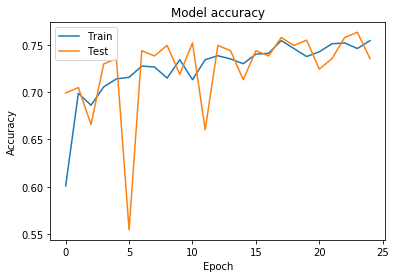

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Test the model on the testing data 

In [83]:

predicitions = model.predict_generator(test_it)
loss, acc = model.evaluate_generator(test_it)


## Print the model's accuracy on the test data

In [84]:
print("The model's accuracy on the test data is: " + str(acc))

The model's accuracy on the test data is: 0.73816156


## Define functions for plotting the image and the probability value array

In [85]:
import matplotlib.pyplot as plt

def plot_image(i , predictions_array, true_label, img) : 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    true_label_index = np.argmax(true_label)
    predited_label = np.argmax(predictions_array)
    if predicted_label == true_label_index: 
        color = 'blue'
    else : 
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label_index]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label) :
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array , color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    true_label_index = np.argmax(true_label)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label_index].set_color('blue')



## Now let's plot several images with their predictions 
Correct predictions are in blue. Incorrect predictions are in red.

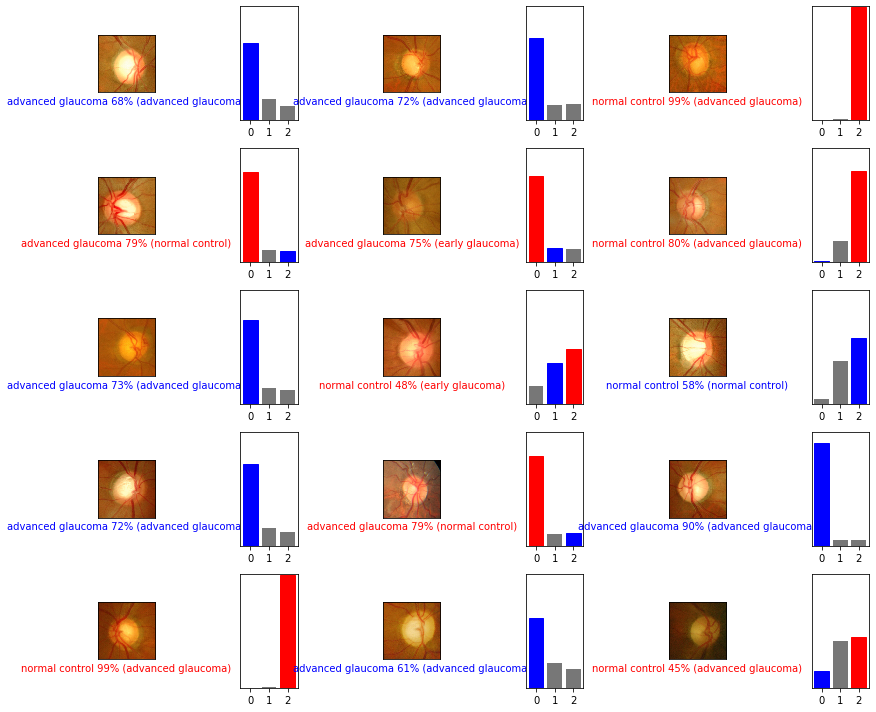

In [86]:


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images) :
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predicitions[i], Y, X)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predicitions[i], Y)
plt.tight_layout()
plt.show()


## Resources

- https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/1YRRAC
- https://keras.io/visualization/
- https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=LWTisYLQM1aM
- Adapted from the Classify Images of Clothing Website by François Chollet, 2017, MIT
- https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0207982